# Hierarchical Clustering

### Import the libraries

In [8]:
import pandas as pd
import numpy as np

### Import dataset

In [9]:
df = pd.read_csv('housing.csv', usecols=['longitude', 'latitude', 'median_house_value'])
df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


### Check for any missing data

In [10]:
df.isnull().any()

longitude             False
latitude              False
median_house_value    False
dtype: bool

In [11]:
X = df.iloc[:, :3].values
X[:2]

array([[-1.2223e+02,  3.7880e+01,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  3.5850e+05]])

### Scale the data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:2]

array([[-1.32783522,  1.05254828,  2.12963148],
       [-1.32284391,  1.04318455,  1.31415614]])

### Use the dendrogram to find the optimal number of clusters

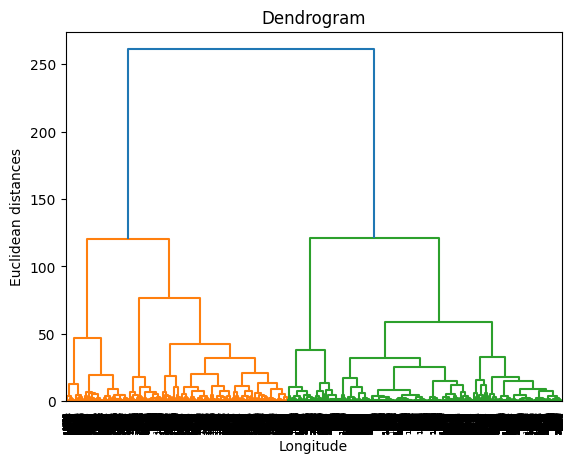

In [13]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Longitude')
plt.ylabel('Euclidean distances')
plt.show()

### Training the Hierarchical Clustering model on the dataset

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

/Users/MoonlightMatrix/miniforge3/envs/tensorflow_ml/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Visualize the data

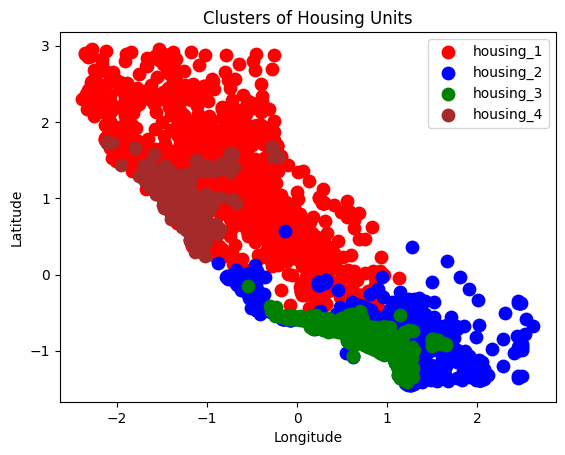

In [15]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0, 1], s = 80, c = 'red', label='housing_1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1, 1], s = 80, c = 'blue', label='housing_2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2, 1], s = 80, c = 'green', label='housing_3')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3, 1], s = 80, c = 'brown', label='housing_4')
plt.title('Clusters of Housing Units')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()